In [1]:
#Data processing
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

#Plotting
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#Data analysis
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

#Machine Learning Model
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

#Evaluate k-means model
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df1 = pd.read_csv('/Users/duc_hoang/Box Sync/Fermilab Summer Research/CNN-Architectural-Analysis/MINERvA-Vertex-Finding/Data/Combined-population/Combined-populations-with-labels.csv',index_col =0)

In [3]:
df = df1.drop('group',axis=1)

In [4]:
#Normalize the data (to standard model scale) to prepare for PCA analysis
df_means = df.mean()
df_means.loc['final_accuracy', 'genealogy'] = 0
df_stds = df.std()
df_stds.loc['final_accuracy', 'genealogy'] = 1

df_normed = (df-df_means)/df_stds

# Quick PCA Analysis

In [5]:
X = df_normed.drop(columns=['initial_accuracy','final_accuracy', 'genealogy'])

In [6]:
colors = ['crimson' if x == "Jesse" else "lime" for x in df1["group"]]

(-10, 30)

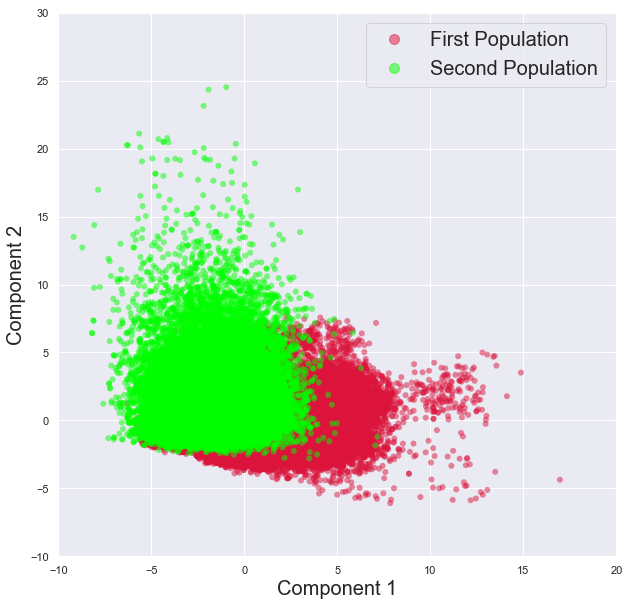

In [12]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected1 = pca.fit_transform(X)

fig = plt.figure(figsize=[10,10])
plt.scatter(projected1[:, 0], projected1[:, 1],
            color = colors, edgecolor='none', alpha=0.5)

#Manually add in legend
low_accuracy_legend = mlines.Line2D([], [], color='crimson', marker='o', linestyle='None',
                                    markersize=10, label='First Population', alpha = 0.5)
high_accuracy_legend = mlines.Line2D([], [], color='lime', marker='o', linestyle='None',
                                    markersize=10, label='Second Population', alpha = 0.5)

plt.legend(handles=[low_accuracy_legend, high_accuracy_legend], fontsize = 20)
# ----------------------

plt.xlabel('Component 1', fontsize = 20)
plt.ylabel('Component 2', fontsize = 20)

plt.xlim(-10,20)
plt.ylim(-10,30)

#plt.savefig('PCD-2D-pop.png')

In [13]:
#Select First Population
First_projected = projected1[df1["group"] == "Jesse"]

#Second one
Second_projected = projected1[df1["group"] == "GA"]

In [14]:
#Plot First population with density
#Calculate the point density
xy1 = np.vstack([First_projected[:,0], First_projected[:,1]])
z1 = gaussian_kde(xy1)(xy1)

In [15]:
#Plot second population with density
#Calculate the point density
xy2 = np.vstack([Second_projected[:,0], Second_projected[:,1]])
z2 = gaussian_kde(xy2)(xy2)

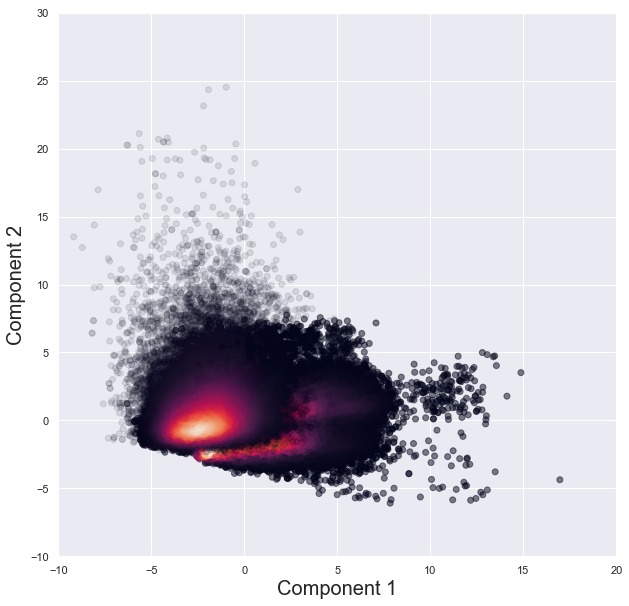

In [16]:
#Plot both of them together
fig = plt.figure(figsize=[10,10])
plt.scatter(First_projected[:,0], First_projected[:,1], c=z1,
            edgecolor=None, alpha = 0.5)
            
plt.scatter(Second_projected[:,0], Second_projected[:,1], c=z2,
            edgecolor=None, alpha = 0.1)

plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)

plt.xlim(-10,20)
plt.ylim(-10,30)
            
plt.show()

(-10, 30)

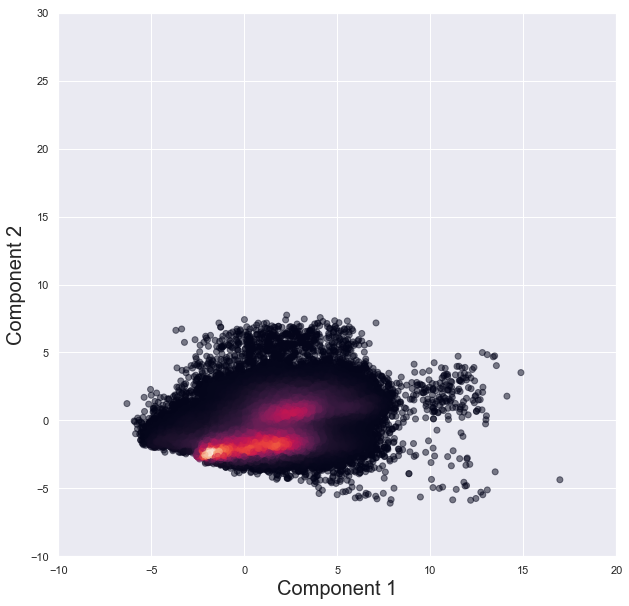

In [17]:
#Just the first one
fig = plt.figure(figsize=[10,10])
plt.scatter(First_projected[:,0], First_projected[:,1], c=z1,
            edgecolor=None, alpha = 0.5)

plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)

plt.xlim(-10,20)
plt.ylim(-10,30)

(-10, 30)

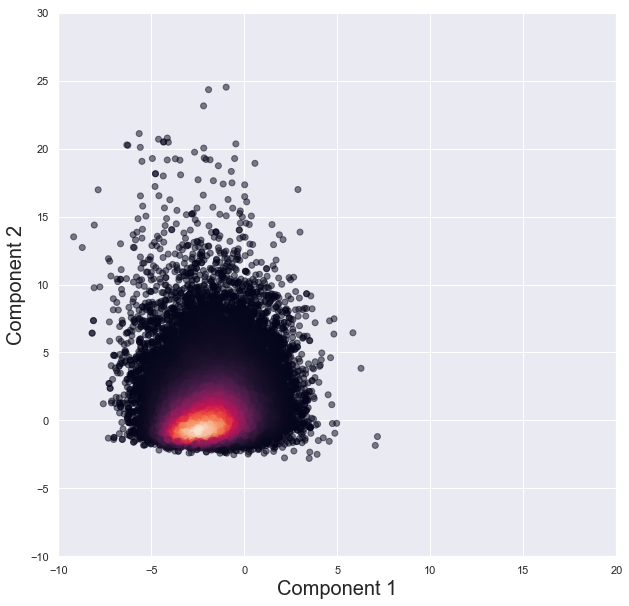

In [18]:
#Just the second one
fig = plt.figure(figsize=[10,10])
plt.scatter(Second_projected[:,0], Second_projected[:,1], c=z2,
            edgecolor=None, alpha = 0.5)

plt.xlabel('Component 1', fontsize=20)
plt.ylabel('Component 2', fontsize=20)

plt.xlim(-10,20)
plt.ylim(-10,30)